In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from rich import print
from rich.console import Console
from rich.table import Table
from rich.progress import track
from time import sleep
import os
import sys
from rich.columns import Columns
from rich.markdown import Markdown
from rich.syntax import Syntax
console = Console()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import plotly.express as px

## Data Load

In [28]:
df = pd.read_csv("UniversalBank.csv")

In [29]:
#I found the number of NaNs in the data.
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Data Visualizations¶

<AxesSubplot:ylabel='Personal Loan'>

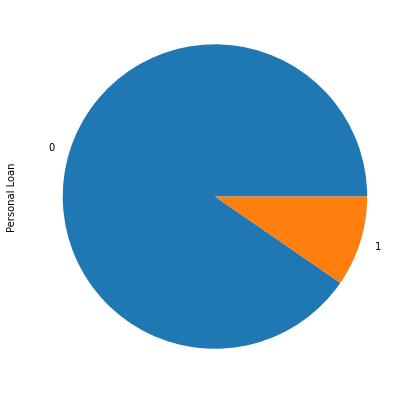

In [31]:
__count = df['Personal Loan'].value_counts()
__count.plot.pie(y='mass', figsize=(7, 7))

<AxesSubplot:>

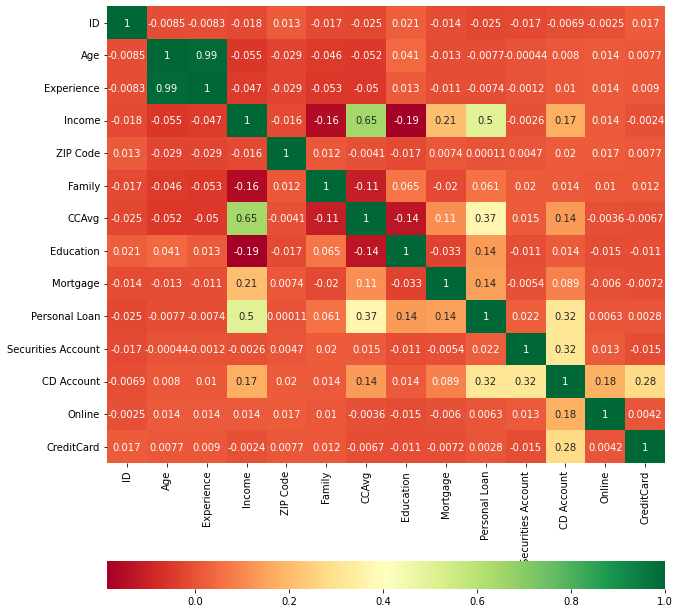

In [32]:
cor_df = df.corr(method='pearson')
plt.figure(figsize=(10,12))
sns.heatmap(cor_df, cmap='RdYlGn',annot=True,cbar_kws={"orientation": "horizontal"})

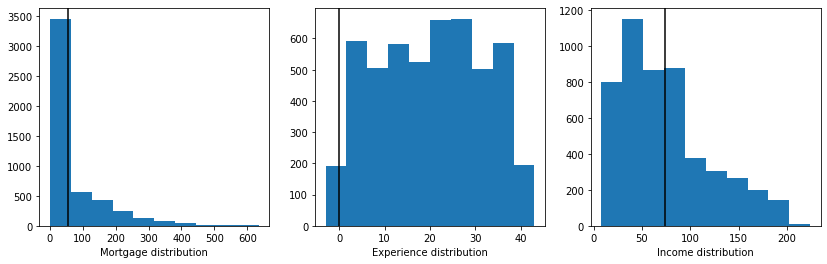

In [33]:
fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize = (14,4))

ax0.hist(df.Mortgage)
ax0.set_xlabel('Mortgage distribution')
ax0.axvline(df.Mortgage.mean(), color = "black")

ax1.hist(df.Experience)
ax1.set_xlabel('Experience distribution')
ax1.axvline(0, color = "black");

ax2.hist(df.Income)
ax2.set_xlabel('Income distribution')
ax2.axvline(df.Income.mean(), color = "black");

/var/folders/zb/cth9fgt954bgpsf9fnrl50jh0000gn/T/ipykernel_66499/589021640.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/zb/cth9fgt954bgpsf9fnrl50jh0000gn/T/ipykernel_66499/589021640.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




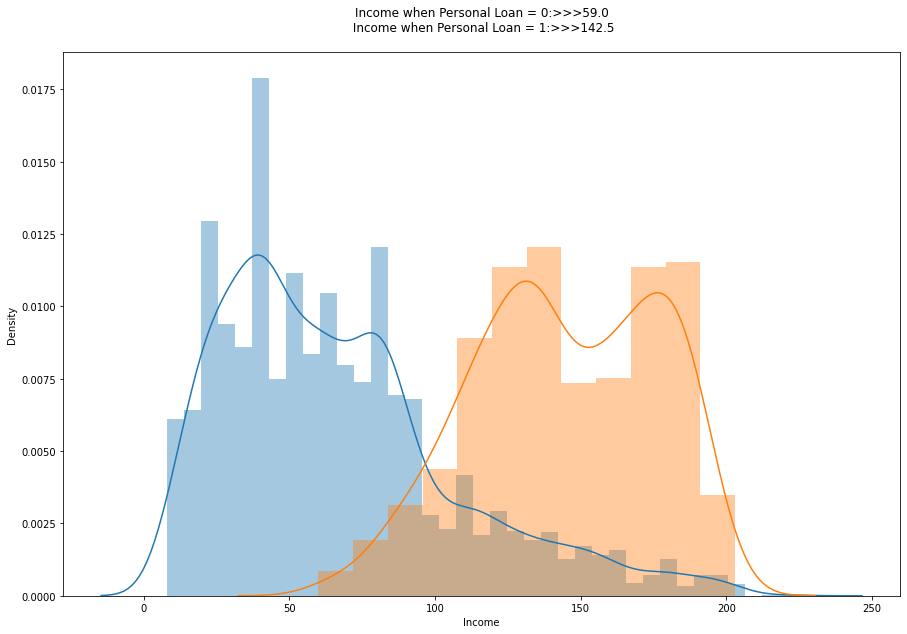

59.0

142.5

In [34]:
plt.figure(figsize = (15,10))
sns.distplot( df[df["Personal Loan"] == 0]['Income']).set(title=f'Income when Personal Loan = 0:>>>{df[df["Personal Loan"] == 0]["Income"].median()}\n Income when Personal Loan = 1:>>>{df[df["Personal Loan"] == 1]["Income"].median()}\n')
sns.distplot( df[df["Personal Loan"] == 1]['Income'])
plt.show()
print(df[df["Personal Loan"] == 0]["Income"].median())
print(df[df["Personal Loan"] == 1]["Income"].median())


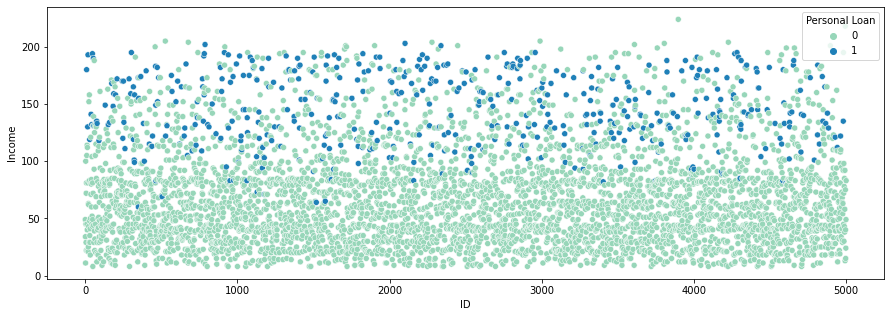

In [35]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = "ID", y = "Income", data=df, hue = "Personal Loan", palette="YlGnBu", alpha = 1);

#### 이 시각화에서는 신용을 받은 사람과 받지 못한 사람의 수입을 표시했습니다. 
#### 차용인의 소득은 중간 142.5, 못받은 사람은 59대 전후로 둘의 거의 2배인 것을 알 수 있습니다. 
#### 따라서 고소득자에게 대출을 제공하는 것이 좋습니다.

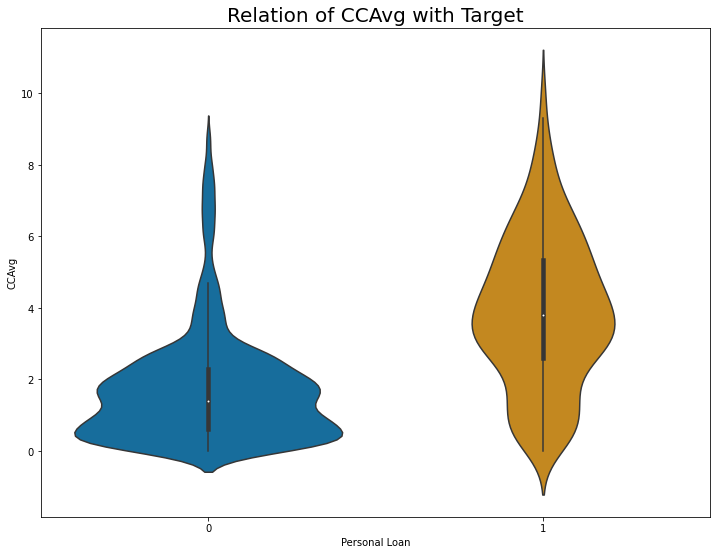

In [40]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(x=df['Personal Loan'], y=df['CCAvg'], palette = 'colorblind')
plt.title('Relation of CCAvg with Target', fontsize = 20, fontweight = 30)
plt.show()

# Classification

In [41]:
X = df.drop("Personal Loan",axis=1)
y = df['Personal Loan']

In [42]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 0)

### LogisticRegression

precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.84      0.64      0.72        96

    accuracy                           0.95      1000
   macro avg       0.90      0.81      0.85      1000
weighted avg       0.95      0.95      0.95      1000

Model accuracy: 0.953!

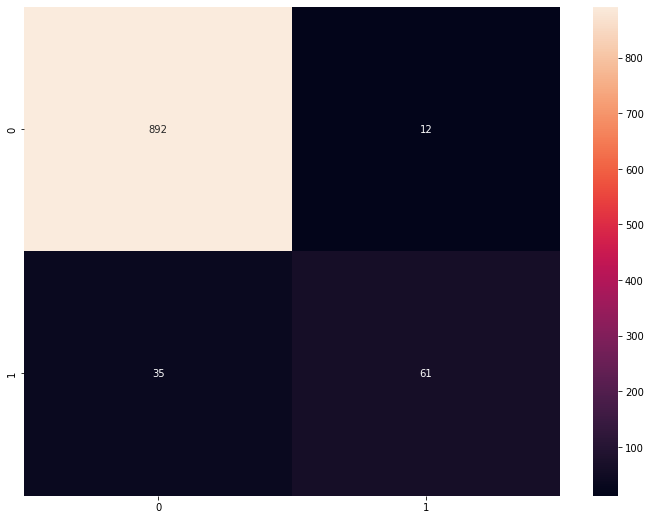

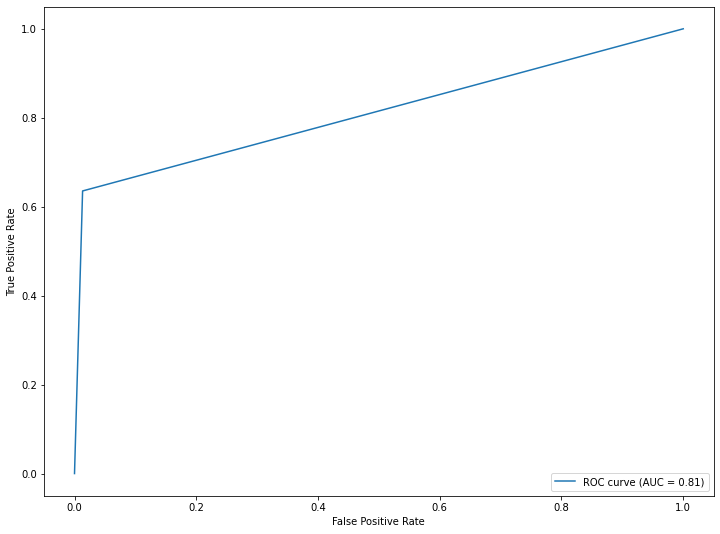

In [47]:
LR_model = LogisticRegression()
LR_model.fit(X_train ,y_train)

y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))
print(f"Model accuracy: [bold red]{metrics.accuracy_score(y_test, y_pred)}[/bold red]!")

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt = "g")
plt.show()

fpr, tpr , thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr,tpr = tpr,roc_auc = roc_auc,estimator_name="ROC curve")
display.plot()
plt.show()

### SVC

precision    recall  f1-score   support

           0       0.98      1.00      0.99       904
           1       0.97      0.81      0.89        96

    accuracy                           0.98      1000
   macro avg       0.98      0.91      0.94      1000
weighted avg       0.98      0.98      0.98      1000

Model accuracy: 0.98!

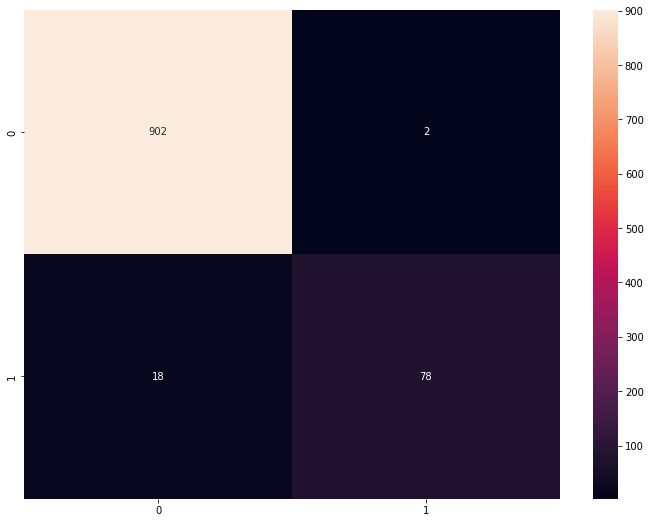

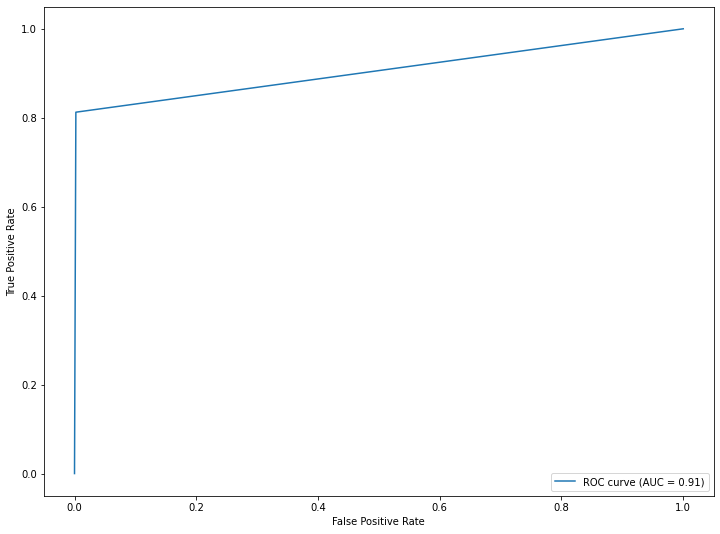

In [49]:
SVC_model = SVC()
SVC_model.fit(X_train ,y_train)

y_pred = SVC_model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))
print(f"Model accuracy: [bold red]{metrics.accuracy_score(y_test, y_pred)}[/bold red]!")

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt = "g")
plt.show()

fpr, tpr , thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr,tpr = tpr,roc_auc = roc_auc,estimator_name="ROC curve")
display.plot()
plt.show()

### DecisionTreeClassifier

precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.92      0.90      0.91        96

    accuracy                           0.98      1000
   macro avg       0.96      0.94      0.95      1000
weighted avg       0.98      0.98      0.98      1000

Model accuracy: 0.983!

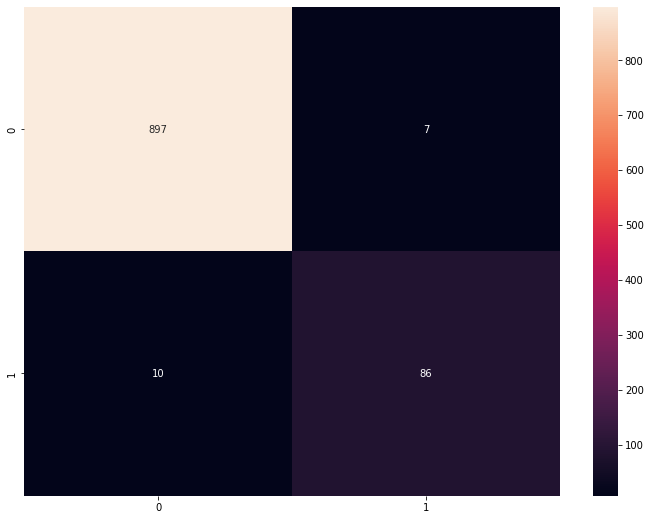

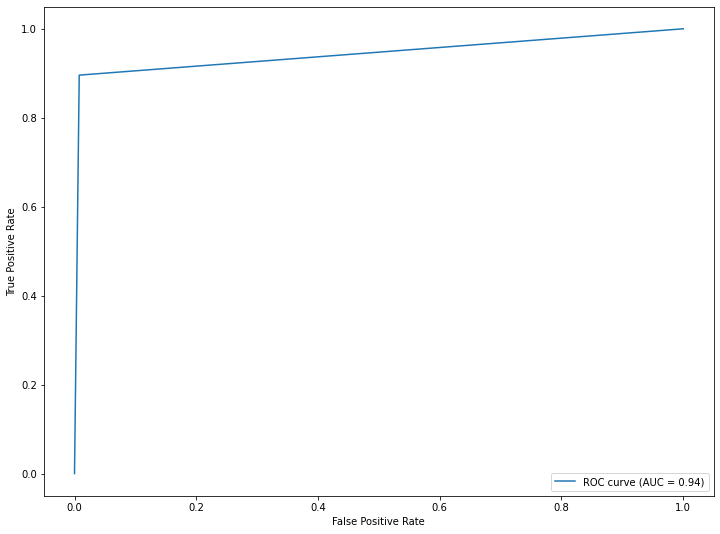

In [50]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train ,y_train)

y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))
print(f"Model accuracy: [bold red]{metrics.accuracy_score(y_test, y_pred)}[/bold red]!")

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt = "g")
plt.show()

fpr, tpr , thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr,tpr = tpr,roc_auc = roc_auc,estimator_name="ROC curve")
display.plot()
plt.show()

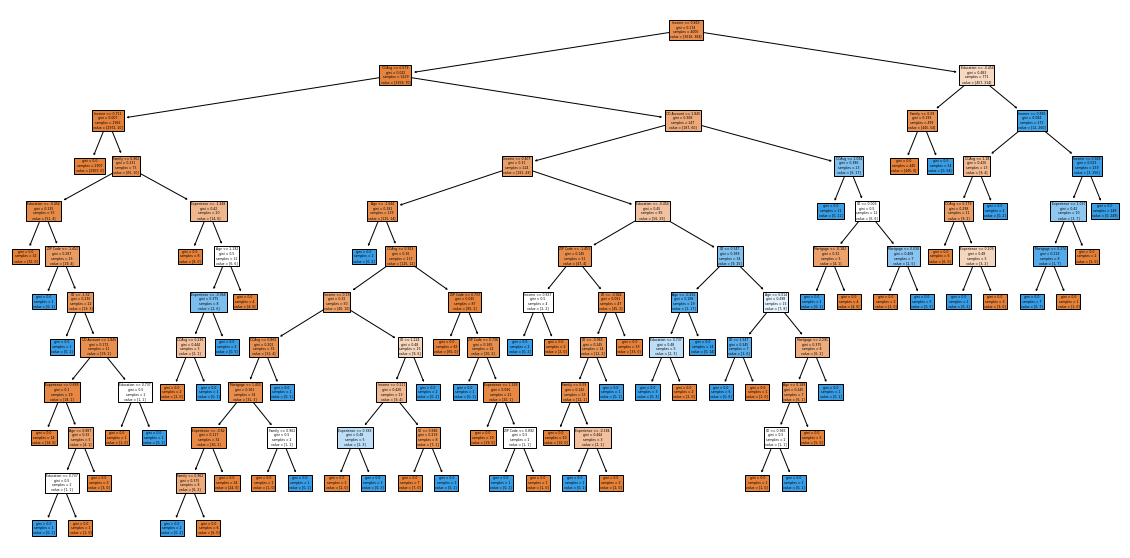

In [52]:
from sklearn.tree import plot_tree

cols = df.drop("Personal Loan",axis = 1).columns

plt.figure(figsize = (20,10))
plot_tree(tree_model,feature_names = cols, filled=True)
plt.show()

### RandomForestClassifier

precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.98      0.88      0.92        96

    accuracy                           0.99      1000
   macro avg       0.98      0.94      0.96      1000
weighted avg       0.99      0.99      0.99      1000

Model accuracy: 0.986!

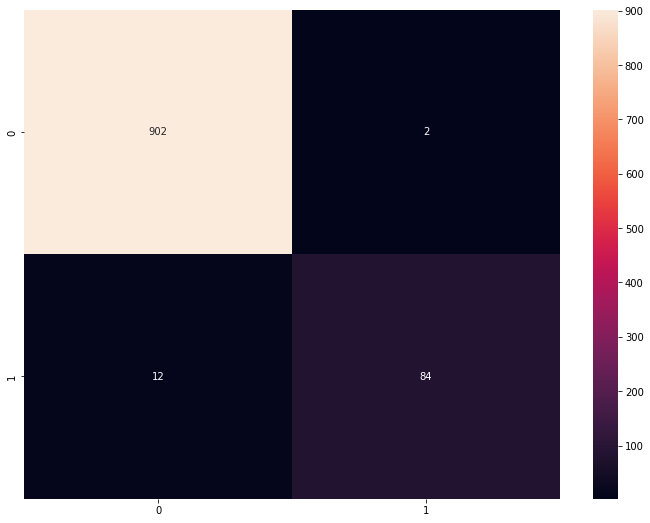

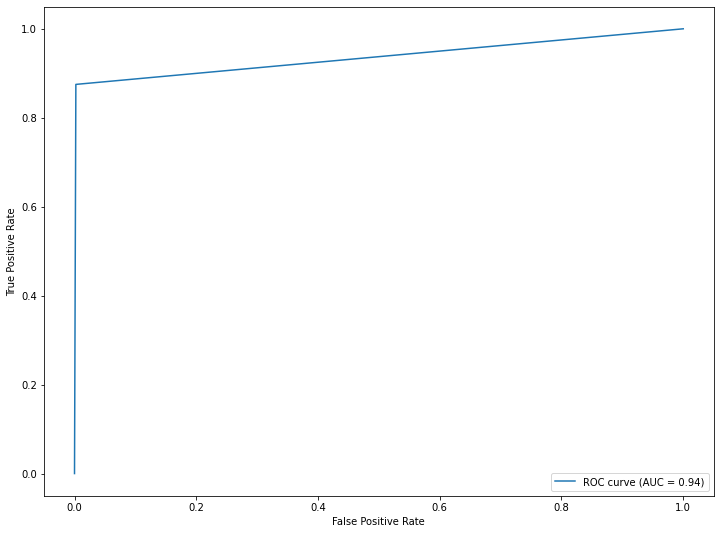

In [53]:
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train ,y_train)

y_pred = RFC_model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))
print(f"Model accuracy: [bold red]{metrics.accuracy_score(y_test, y_pred)}[/bold red]!")

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt = "g")
plt.show()

fpr, tpr , thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr,tpr = tpr,roc_auc = roc_auc,estimator_name="ROC curve")
display.plot()
plt.show()

### XGBClassifier

precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.94      0.92      0.93        96

    accuracy                           0.99      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.99      0.99      0.99      1000

Model accuracy: 0.986!

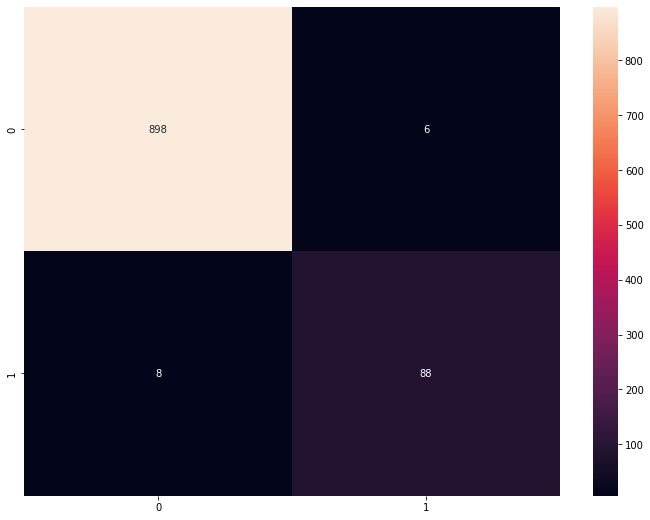

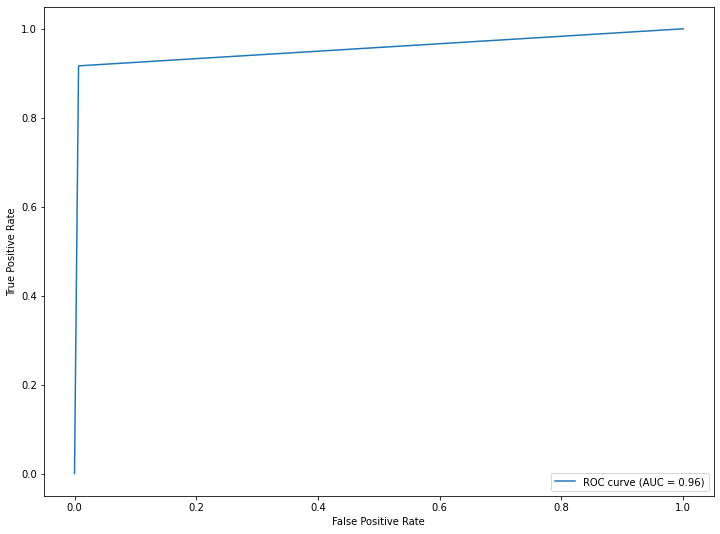

In [54]:
XGBC_model = XGBClassifier()
XGBC_model.fit(X_train ,y_train)

y_pred = XGBC_model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))
print(f"Model accuracy: [bold red]{metrics.accuracy_score(y_test, y_pred)}[/bold red]!")

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt = "g")
plt.show()

fpr, tpr , thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr,tpr = tpr,roc_auc = roc_auc,estimator_name="ROC curve")
display.plot()
plt.show()